In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# resize the image
def down_to_10(img_name, img_path = '../data/lettuce_home/', result_path = '../data/lettuce_home/resized/'):
    img = cv2.imread(img_path + img_name)
    scale_percent = 10 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    cv2.imwrite(result_path + img_name, resized)

In [11]:
def gen_plant_mask(inp_img):
  # generate a mask to figure out the plant region from an RGB image
  
  # green value greater than 30 in number
  # and greater than 2R and 2B
  
  hsv_img = cv2.cvtColor(inp_img,cv2.COLOR_BGR2HSV)
  mask = cv2.inRange(hsv_img, (36, 25, 25), (70, 255,255))
  #mask = np.logical_and(np.logical_and(np.greater(inp_img[:,:,1], green_val_threshold), 
  #                                     inp_img[:,:,1] >= green_mult_threshold*inp_img[:,:,0]
  #                                    ), 
  #                      inp_img[:,:,1] >= green_mult_threshold*inp_img[:,:,2])
  
  # open the mask
  #mask = cv2.morphologyEx(mask, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)))
  mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)))
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT,(15,15)))
  
  bool_mask = mask>0
  
  int_mask = np.zeros_like(mask, dtype=np.uint8)
  int_mask[bool_mask] = 255
  return int_mask
            

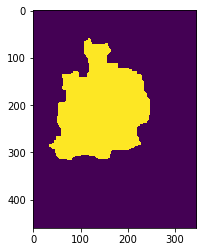

In [4]:
img = cv2.imread('../data/lettuce_home/img1.jpg')
mask = gen_plant_mask(img)

plt.imshow(mask)
plt.show()

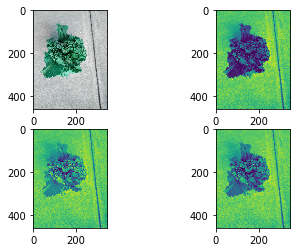

In [5]:
fig = plt.figure()
fig.add_subplot(2,2,1)
plt.imshow(img)
fig.add_subplot(2,2,2)
plt.imshow(img[:,:,0])
fig.add_subplot(2,2,3)
plt.imshow(img[:,:,1])
fig.add_subplot(2,2,4)
plt.imshow(img[:,:,2])
plt.show()


In [6]:
img = cv2.imread('../data/lettuce_home/img1.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray, gen_plant_mask(img))
img=cv2.drawKeypoints(gray,kp,img)
cv2.imwrite('../result/lettuce_home/sift/img1.jpg',img)

True

In [13]:
def match_sift(img1, img2):
  # Initiate SIFT detector
  sift = cv2.xfeatures2d.SIFT_create()
  gray_im1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  gray_im2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  # find the keypoints and descriptors with SIFT
  kp1, des1 = sift.detectAndCompute(gray_im1, mask = gen_plant_mask(img1))
  kp2, des2 = sift.detectAndCompute(gray_im2, mask = gen_plant_mask(img2))
  # BFMatcher with default params
  bf = cv2.BFMatcher()
  matches = bf.knnMatch(des1,des2,k=2)
  # Apply ratio test
  good = []
  for m,n in matches:
      if m.distance < 0.75*n.distance:
          good.append([m])
  # cv.drawMatchesKnn expects list of lists as matches.
  img3 = cv2.drawMatchesKnn(gray_im1,kp1,gray_im2,kp2,good,None,flags=cv2.DrawMatchesFlags_DEFAULT)
  
  return img3

In [8]:
def load_image(imName, path = '../data/lettuce_home/'):
    img = cv2.imread(path + imName)
    
    return img

In [14]:
num_images = 6

for i in range(1, num_images+1):
  for j in range(i+1, num_images+1):
      im1 = load_image('img{}.jpg'.format(i))
      im2 = load_image('img{}.jpg'.format(j))
      
      match_im = match_sift(im1, im2)
      
      cv2.imwrite('../result/lettuce_home/sift_matching/{}_{}.jpg'.format(i,j), match_im)

      #plt.imshow(match_2_3),plt.show()